In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/Housing.csv')

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df['mainroad'] = pd.factorize(df.mainroad)['no','yes']
df['guestroom'] = pd.factorize(df.guestroom)[0]
df['basement'] = pd.factorize(df.basement)[0]
df['hotwaterheating'] = pd.factorize(df.hotwaterheating)[0]
df['airconditioning'] = pd.factorize(df.airconditioning)[0]
df['prefarea'] = pd.factorize(df.prefarea)[0]
df['furnishingstatus'] = pd.factorize(df.furnishingstatus)[0]

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,prefareag
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,1,0,1
2,12250000,9960,3,2,2,0,0,1,0,1,2,0,1,0
3,12215000,7500,4,2,2,0,0,1,0,0,3,0,0,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,1,0,1


In [31]:
x=df.drop(['price'],axis=1).values
y=df['price'].values

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)

In [33]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

In [40]:
ml.predict([[13300000,7420,4,2,3,0,0,0,0,0,2,0,0]])

array([4.31617761e+09])

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7235015223200348

Text(0.5, 1.0, 'actual vs predicted')

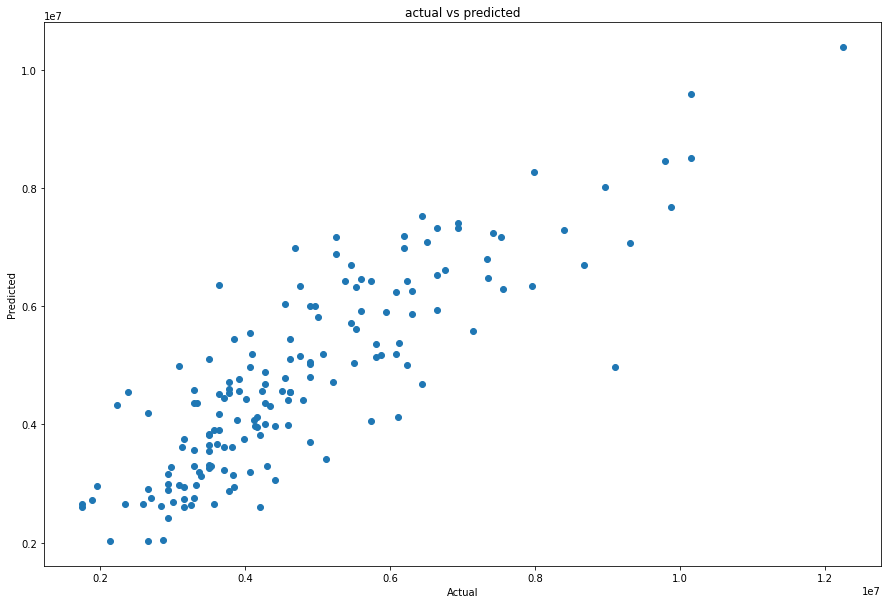

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('actual vs predicted')

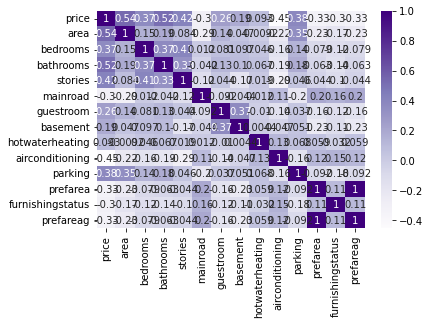

In [48]:
sns.heatmap(df.corr(),annot=True,cmap='Purples')

In [ ]:
import pickle
from pyexpat import model
with open('model.pkl', 'wb') as files:
    pickle.dump(model,files)